1.   Luisa Fernanda Arboleda Segura 
2.   Johana Catalina Rios 
3.   Franklin Garces Usme 


##Tercera Tarea Modelos S-I y S-I-R

En una escuela, despues de las vacaciones llegan sus 421 estudiantes y tres de ellos llegan con una gripa que se espande entre todos los otros estudiantes, los detalles de la expansión se recopilaron los datos de la gripa en los primeros 10 dias:



In [0]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import RK45


In [0]:

Suceptibles=[418, 417, 415, 412, 409, 404, 397, 388, 377, 361, 342]
Infectados=[3, 4, 6, 8, 11, 16, 22, 30, 40, 54, 70]
Recuperados=[0, 0, 0, 1, 1, 1, 2, 3, 4, 6, 9]
df=pd.DataFrame({'Suceptibles':Suceptibles,'Infectados':Infectados, 'Recuperados': Recuperados })
df


,Suceptibles,Infectados,Recuperados
0,418,3,0
1,417,4,0
2,415,6,0
3,412,8,1
4,409,11,1
5,404,16,1
6,397,22,2
7,388,30,3
8,377,40,4
9,361,54,6


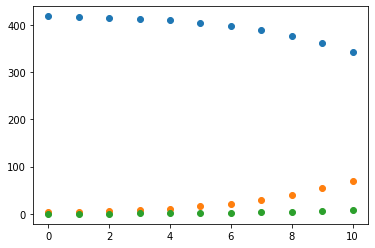

In [0]:
plt.scatter(df.index,df['Suceptibles']) #azul
plt.scatter(df.index,df['Infectados'])  # naranja
plt.scatter(df.index,df['Recuperados']) #recuperados

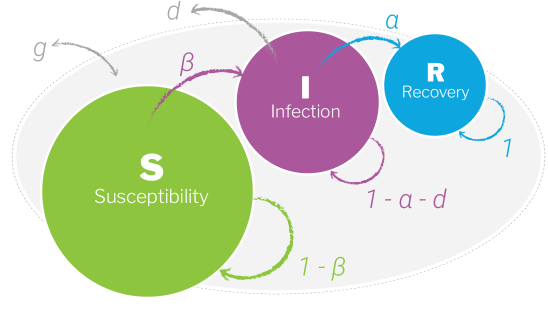

### Modelo SIR

El modelo SIR es un modelo compartimental que rastrea el crecimiento y la descomposición de las tres etapas principales de la enfermedad de un paciente Susceptibilidad , infección y recuperación . En Perception Health, aprovechamos una aplicación del modelo SIR para realizar un estudio sobre enfermedades crónicas. El análisis catalizó múltiples descubrimientos con respecto al comportamiento de la enfermedad. A medida que se trata a un paciente, el modelo SIR calcula la tasa de infección y recuperación en promedio en una población específica.


* S: Susceptibles
* I: Infectados
* R: Recuperados



Modelo:  

$\alpha$: Razón de cambio de infectados
$\beta$: razón de cambio de recuperados 
 

Ecuaciones (ODE):
\begin{align*}
& \frac{\mathrm{d}S}{\mathrm{d}T}= - \alpha S I  \\
& \frac{\mathrm{d}I}{\mathrm{d}T}= \alpha S I - \beta I  \\
& \frac{\mathrm{d}R}{\mathrm{d}T}= \beta I  \\
 \\
\end{align*}

donde $N=S+I+R$ es la poblacion, $T$ es el lapso de tiepo desde la fecha de inicio.

In [0]:
a= 0.001
b= 0.08

def dP_dt(P, t):
    return [-a*P[0]*P[1], a*P[0]*P[1]-b*P[1],b*P[1]]

ts = np.linspace(0, 20, 20)
P0 = [418, 3, 0]
Ps = odeint(dP_dt, P0, ts)
S= Ps[:,0]
I= Ps[:,1]
R= Ps[:,2]
print(Ps)


[[4.18000000e+02 3.00000000e+00 0.00000000e+00]
 [4.16418105e+02 4.27856560e+00 3.03329342e-01]
 [4.14174610e+02 6.08988753e+00 7.35502824e-01]
 [4.11006625e+02 8.64360708e+00 1.34976793e+00]
 [4.06560548e+02 1.22195665e+01 2.21988517e+00]
 [4.00374112e+02 1.71793248e+01 3.44656347e+00]
 [3.91868020e+02 2.39674732e+01 5.16450664e+00]
 [3.80361709e+02 3.30895898e+01 7.54870134e+00]
 [3.65134642e+02 4.50481371e+01 1.08172210e+01]
 [3.45555774e+02 6.02180366e+01 1.52261892e+01]
 [3.21287642e+02 7.86607885e+01 2.10515696e+01]
 [2.92526905e+02 9.99191124e+01 2.85539825e+01]
 [2.60179631e+02 1.22891637e+02 3.79287323e+01]
 [2.25838168e+02 1.45908810e+02 4.92530214e+01]
 [1.91493633e+02 1.67056217e+02 6.24501502e+01]
 [1.59075750e+02 1.84636176e+02 7.72880741e+01]
 [1.30033567e+02 1.97551329e+02 9.34151037e+01]
 [1.05135732e+02 2.05445929e+02 1.10418339e+02]
 [8.45161528e+01 2.08600745e+02 1.27883102e+02]
 [6.78648499e+01 2.07698092e+02 1.45437058e+02]]


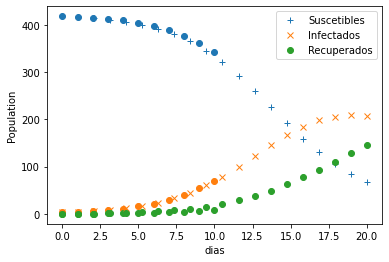

In [0]:
plt.plot(ts,S, "+", label="Suscetibles")
plt.plot(ts,I, "x", label="Infectados")
plt.plot(ts,R, "o", label="Recuperados")
plt.scatter(df.index,df['Suceptibles'])
plt.scatter(df.index,df['Infectados'])
plt.scatter(df.index,df['Recuperados'])
plt.xlabel("dias")
plt.ylabel("Population")
plt.rcParams['figure.figsize'] = (20, 7)
plt.legend();

Tras el análisis de sensibilidad, se obtiene como resultado las razones de cambio que más se ajustan al modelo estimado son: $\alpha$:0.001   $\beta$: 0.08, la tasa de suscetibles en comparacion con los infectados y recuperados es inversamente proporsional.